# 1. Total Steps vs. Calories

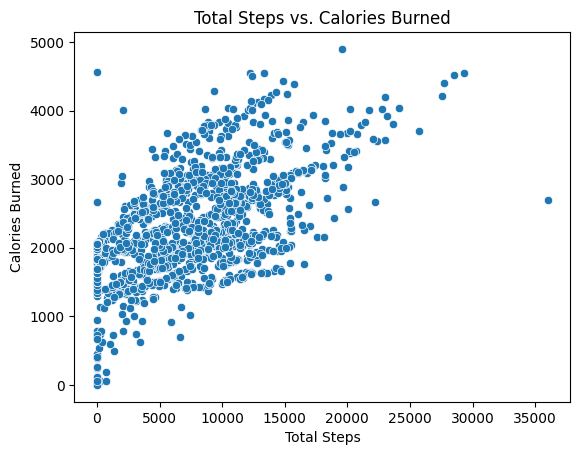

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/DailyActivity.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/DailyActivity.csv")

# Load the datasets
daily_activity1 = pd.read_csv(data_path1)
daily_activity2 = pd.read_csv(data_path2)
daily_activity = pd.concat([daily_activity1, daily_activity2], ignore_index=True)

# Analyze the relationship between total steps and calories burned
sns.scatterplot(data=daily_activity, x='TotalSteps', y='Calories')
plt.title('Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')

# Save the visualization in the 'visuals' folder
visuals_path = os.path.join(current_dir, "../visuals/total_steps_vs_calories.png")
plt.savefig(visuals_path)

# Show the plot
plt.show()


In this scatter plot analysis of "Total Steps vs. Calories Burned", a **positive correlation** is evident: as total steps increase, the number of calories burned also tends to rise.

# 2. Hourly Calorie Burn Patterns
Analyze how calories burned vary throughout the day.

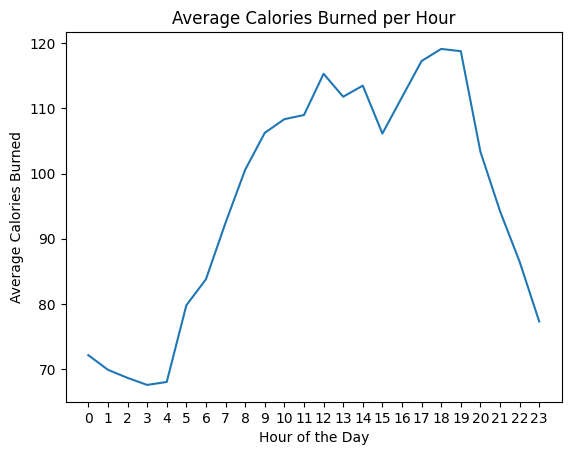

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/HourlyCalories.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/HourlyCalories.csv")

# Load the datasets
hourly_calories1 = pd.read_csv(data_path1)
hourly_calories2 = pd.read_csv(data_path2)

# Combine the two datasets
hourly_calories = pd.concat([hourly_calories1, hourly_calories2], ignore_index=True)

# Combine 'ActivityDate' and 'ActivityTime' into a single datetime column
hourly_calories['DateTime'] = pd.to_datetime(hourly_calories['ActivityDate'] + ' ' + hourly_calories['ActivityTime'])

# Extract the hour from this combined datetime column
hourly_calories['Hour'] = hourly_calories['DateTime'].dt.hour
avg_hourly_calories = hourly_calories.groupby('Hour')['Calories'].mean().reset_index()

# Average calories burned per hour
sns.lineplot(data=avg_hourly_calories, x='Hour', y='Calories')
plt.title('Average Calories Burned per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Calories Burned')
plt.xticks(range(0, 24))
visuals_path = os.path.join(current_dir, "../visuals/Average Calories Burned per Hour.png")
plt.savefig(visuals_path)
plt.show()


This line chart illustrates the variation in average calories burned per hour throughout the day. From the data, we observe a clear pattern where calorie expenditure gradually increases in the morning hours, reaching a peak in the late afternoon to early evening (around 17:00 to 19:00), likely reflecting increased physical activity during these times. Calorie burn then declines sharply in the evening, with the lowest levels observed late at night and early morning.

**Conclusion:** 
Calorie burn follows a daily cycle, **peaking in the afternoon and evening** when individuals are generally more active. This insight could help in planning exercise routines for maximum calorie burn during high-activity hours.

# 3. Distribution of Activity Levels During the Day

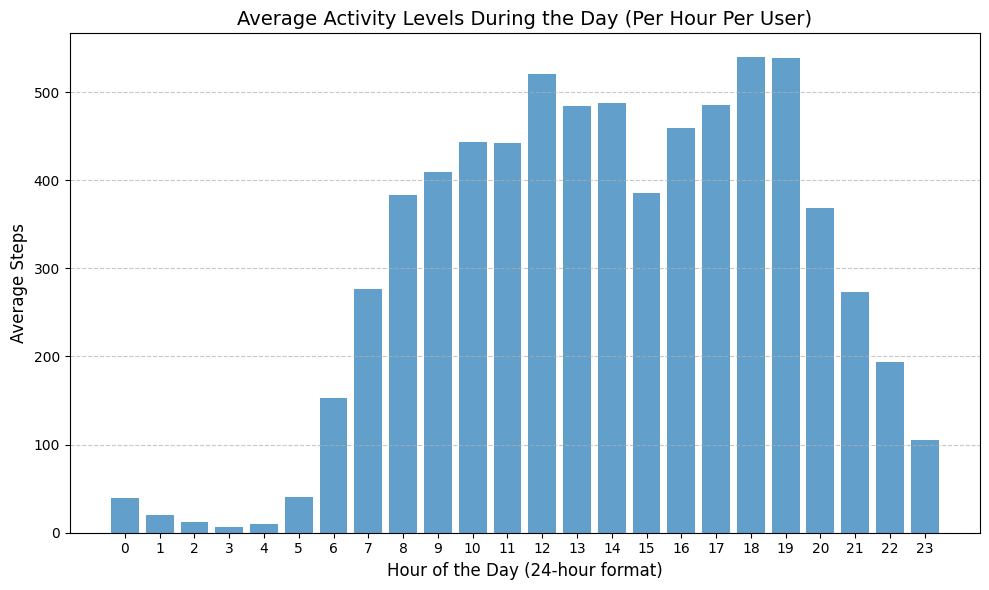

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/HourlySteps.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/HourlySteps.csv")

# Load the datasets
HourlySteps1 = pd.read_csv(data_path1)
HourlySteps2 = pd.read_csv(data_path2)

# Load the datasets
hourly_steps1 = pd.read_csv(data_path1)
hourly_steps2 = pd.read_csv(data_path2)

# Combine the two datasets
hourly_steps = pd.concat([hourly_steps1, hourly_steps2], ignore_index=True)

# Convert `ActivityHour` to a datetime object
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the hour from `ActivityHour`
hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour

# Group by `Id` and `Hour` to calculate the average steps per user per hour
user_hourly_steps = hourly_steps.groupby(['Id', 'Hour'])['StepTotal'].mean().reset_index()

# Group by hour to calculate the overall average steps across users
activity_by_hour = user_hourly_steps.groupby('Hour')['StepTotal'].mean().reset_index()

# Plot the activity distribution
plt.figure(figsize=(10, 6))
plt.bar(activity_by_hour['Hour'], activity_by_hour['StepTotal'], width=0.8, alpha=0.7)
plt.title('Average Activity Levels During the Day (Per Hour Per User)', fontsize=14)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Average Steps', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
visuals_path = os.path.join(current_dir, "../visuals/Average Activity Levels During the Day.png")
plt.savefig(visuals_path)
plt.show()


**Peak Activity Hours:**

The highest average steps occur between 10:00 AM and 7:00 PM, indicating that most users are more active during daytime hours.

**Morning Activity:**

A notable increase in steps starts around 6:00 AM, likely reflecting morning routines such as exercise or commuting.

**Evening Decline:**

Activity levels drop significantly after 8:00 PM, indicating users wind down their day and prepare for rest.

**Minimal Activity Overnight:**

Steps are almost negligible between 12:00 AM and 5:00 AM, as expected during typical sleep hours.

**Consistent Daytime Activity:**

Steps are relatively steady during the peak hours, suggesting users are evenly active throughout the day, potentially due to work or other regular schedules.


# 4. Time Series Analysis
Analyze trends over time.

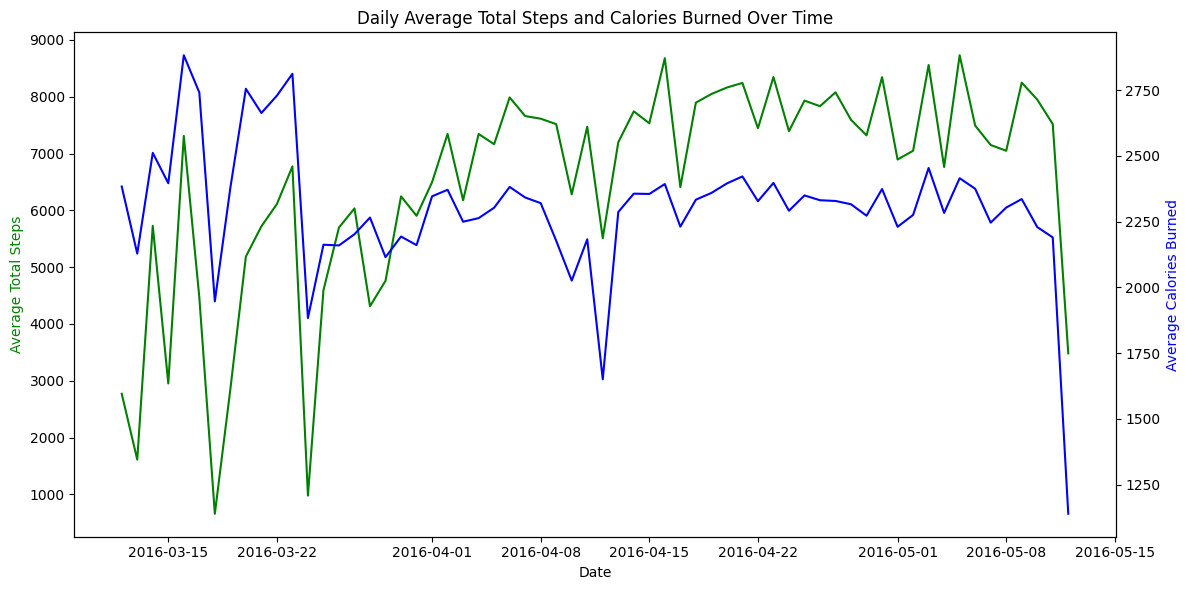

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/DailyActivity.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/DailyActivity.csv")

# Load the datasets
daily_activity1 = pd.read_csv(data_path1)
daily_activity2 = pd.read_csv(data_path2)
daily_activity = pd.concat([daily_activity1, daily_activity2], ignore_index=True)

# Ensure 'ActivityDate' is in datetime format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

# Group data by date
daily_summary = daily_activity.groupby('ActivityDate').agg({'TotalSteps': 'mean', 'Calories': 'mean'}).reset_index()

# Plot trends
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjusted size for better visualization

ax2 = ax1.twinx()
ax1.plot(daily_summary['ActivityDate'], daily_summary['TotalSteps'], 'g-', label='Total Steps')
ax2.plot(daily_summary['ActivityDate'], daily_summary['Calories'], 'b-', label='Calories Burned')

ax1.set_xlabel('Date')
ax1.set_ylabel('Average Total Steps', color='g')
ax2.set_ylabel('Average Calories Burned', color='b')
plt.title('Daily Average Total Steps and Calories Burned Over Time')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Save the visualization in the 'visuals' folder
visuals_path = os.path.join(current_dir, "../visuals/Daily Average Total Steps and Calories Burned Over Time.png")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig(visuals_path)

# Show the plot
plt.show()

This line chart tracks the daily average of total steps and calories burned over time. Here’s a breakdown of the observed trends:

**Correlation in Trends:**

There appears to be a synchronized pattern between total steps (green line) and calories burned (blue line), suggesting that days with higher average steps generally coincide with higher calorie burn. This supports the idea that physical activity directly impacts energy expenditure.

**Variability:**

Both metrics show fluctuations over time, with some days showing notable peaks and valleys. This could indicate variations in daily activity levels among users, possibly due to lifestyle factors like weekdays versus weekends or specific events.

**Decline:**

Towards the end of the observed period, both total steps and calories burned show a noticeable drop. This could be seasonal, event-based, or due to changes in user engagement.

**Conclusion:**

The strong parallel between average total steps and calories burned over time emphasizes the role of physical activity in calorie expenditure. The fluctuating pattern and the final decline could offer insight into user engagement patterns or seasonal behaviors.

# 5. Activity Variances, Weekday versus Weekend
To examine if weekends affect activity levels

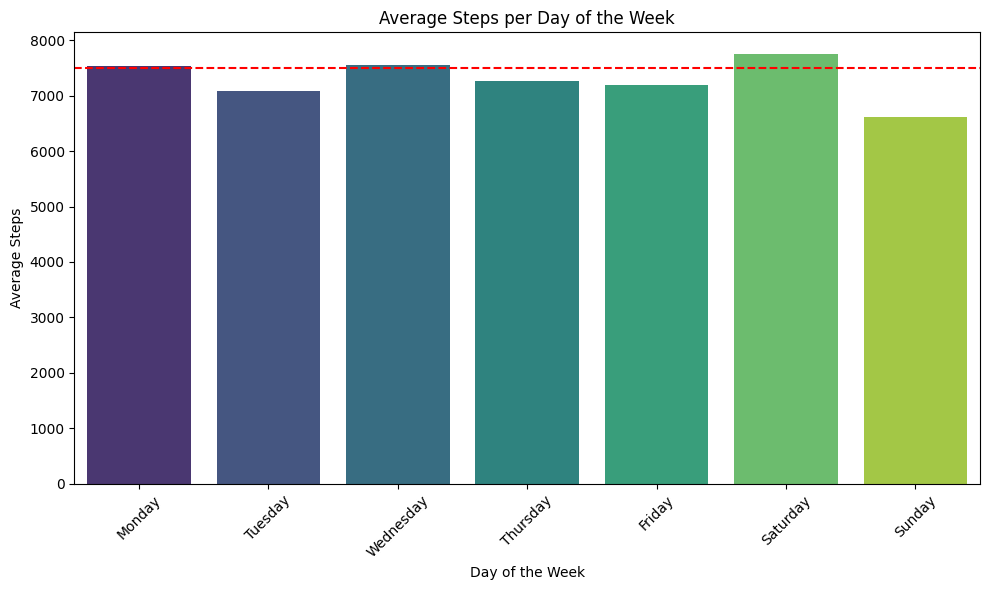

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/DailyActivity.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/DailyActivity.csv")

# Load the datasets
daily_activity1 = pd.read_csv(data_path1)
daily_activity2 = pd.read_csv(data_path2)
daily_activity = pd.concat([daily_activity1, daily_activity2], ignore_index=True)

# Convert to datetime
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
daily_activity['DayOfWeek'] = daily_activity['ActivityDate'].dt.dayofweek  # Extract day of week as a number (0=Monday, 6=Sunday)
daily_activity['DayName'] = daily_activity['ActivityDate'].dt.day_name()   # Extract day of week as a name

# Group by DayName and calculate the mean StepTotal
daily_trends = daily_activity.groupby('DayName')['TotalSteps'].mean().reset_index()

# Sort the days of the week for correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trends['DayName'] = pd.Categorical(daily_trends['DayName'], categories=day_order, ordered=True)
daily_trends = daily_trends.sort_values('DayName')

# Visualize as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_trends, x='DayName', y='TotalSteps', hue='DayName', palette='viridis', dodge=False)
plt.axhline(7500, color='red', linestyle='--', label='Recommended Steps')
plt.title("Average Steps per Day of the Week")
plt.ylabel("Average Steps")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
# Save the visualization in the 'visuals' folder
visuals_path = os.path.join(current_dir, "../visuals/Average Steps per Day of the Week.png")
plt.savefig(visuals_path)

# Show the plot
plt.show()

**Weekend Activity (Saturday and Sunday):**
- Saturday slightly exceeds the benchmark of 7500 steps (indicated by the red line), and has the highest average number of steps among all days of the week. This suggests that users tend to be more active on Saturdays, potentially due to leisure activities, errands, or outdoor activities that require walking.
- Sunday, in contrast, shows a noticeable dip in activity compared to Saturday. This could indicate that users tend to rest or engage in fewer physical activities on Sundays, aligning with a day of relaxation for many people.
  
**Weekday Activity (Monday to Friday):**
- Activity levels on weekdays (Monday to Friday) are generally consistent (all below the benchmark of 7500 steps), with no significant spikes or dips. This suggests that users maintain a regular routine during the workweek, likely influenced by factors like commuting, work-related movement, or scheduled exercise routines.
- Among weekdays, Wednesday and Friday show slightly higher activity levels, which could indicate mid-week or end-of-week bursts of activity (e.g., planned workouts or errands).
  
**Comparing Weekdays to Weekends:**
- Saturday stands out as the most active day, which could reflect users prioritizing physical activity or social/recreational activities on this day.
- Sunday's drop in activity, relative to the rest of the week, creates a distinct weekend pattern: Saturday is high-activity, followed by a rest period on Sunday.
  
**Conclusion:**
The plot shows a meaningful weekly pattern:
- Weekdays have consistent activity levels driven by routines.
- Saturday is the peak activity day, likely due to leisure or recreational activities.
- Sunday marks a rest day with reduced activity.
These insights could inform targeted health campaigns, such as encouraging light activity on Sundays or motivating weekday consistency through challenges or reminders.

# 6. Average Hours of Sleep per Day of the Week

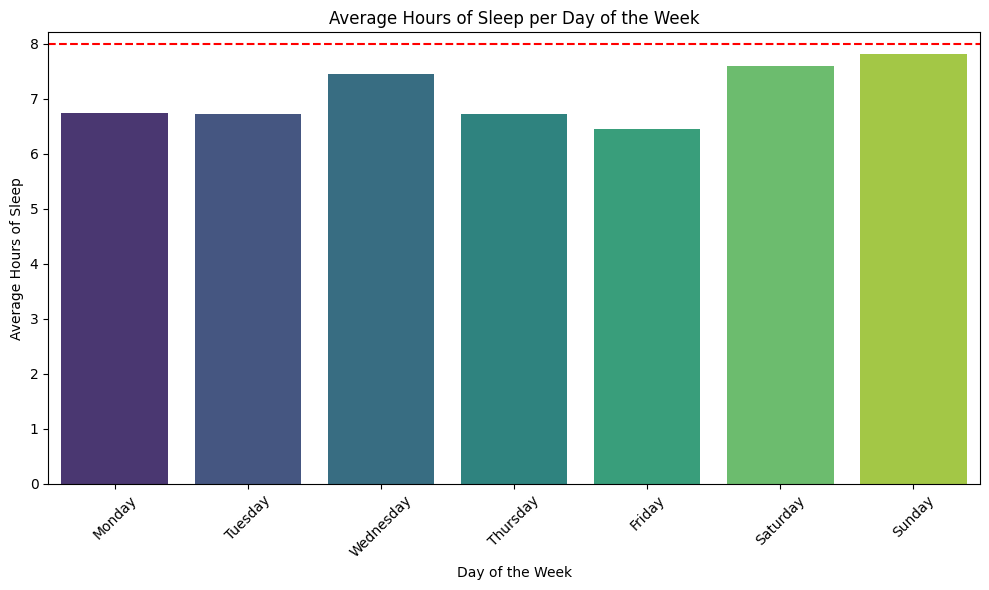

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/MinuteSleep.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/MinuteSleep.csv")

# Load the dataset (example with DailyActivity)
minute_sleep1 = pd.read_csv(data_path1)
minute_sleep2 = pd.read_csv(data_path2)

# Combine the two datasets
minute_sleep = pd.concat([minute_sleep1, minute_sleep2], ignore_index=True)

# Step 1: Filter sleep data (value > 0 indicates sleep)
sleep_data = minute_sleep[minute_sleep['value'] > 0]

# Ensure ActivityDate is in proper datetime format and drop duplicates
sleep_data['ActivityDate'] = pd.to_datetime(sleep_data['ActivityDate'])
sleep_data = sleep_data.drop_duplicates()

# Step 2: Aggregate total sleep minutes per day
daily_sleep = sleep_data.groupby(['ActivityDate', 'Id']).size().reset_index(name='TotalMinutes')

# Step 3: Convert sleep minutes to hours
daily_sleep['TotalHours'] = daily_sleep['TotalMinutes'] / 60

# Seperate the Weekdays
daily_sleep['DayOfWeek'] = daily_sleep['ActivityDate'].dt.dayofweek  # Extract day of week as a number (0=Monday, 6=Sunday)
daily_sleep['DayName'] = daily_sleep['ActivityDate'].dt.day_name()   # Extract day of week as a name

# Group by DayName and calculate the mean StepTotal
daily_sleep_trends = daily_sleep.groupby('DayName')['TotalHours'].mean().reset_index()

# Sort the days of the week for correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sleep_trends['DayName'] = pd.Categorical(daily_sleep_trends['DayName'], categories=day_order, ordered=True)
daily_trends = daily_sleep_trends.sort_values('DayName')

# Visualize as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_sleep_trends, x='DayName', y='TotalHours', hue='DayName', palette='viridis', dodge=False)
plt.axhline(8, color='red', linestyle='--', label='Recommended Steps')
plt.title("Average Hours of Sleep per Day of the Week")
plt.ylabel("Average Hours of Sleep")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Disable the legend if hue is not needed
plt.tight_layout()
# Save the visualization in the 'visuals' folder
visuals_path = os.path.join(current_dir, "../visuals/Average Hours of Sleep per Day of the Week.png")
plt.savefig(visuals_path)

plt.show()

**Weekend Sleep:**

Saturday and Sunday show the highest average sleep hours, exceeding weekday averages, likely due to more leisure time and recovery from the workweek.

**Weekday Sleep:**

Weekdays (Monday through Friday) consistently fall below the recommended 8-hour sleep threshold (red dashed line).
Wednesday has slightly higher sleep compared to other weekdays, potentially due to midweek fatigue recovery.

**Consistency:**

Sleep patterns are more consistent on weekdays, with minimal variation, while weekends show a noticeable increase in sleep duration.

**Key Takeaway:**

Encouraging consistent sleep routines throughout the week could help individuals achieve the recommended 8-hour sleep target, particularly focusing on increasing sleep hours during weekdays

# 7. User Segmentation Based on Steps, Sleep and Calories

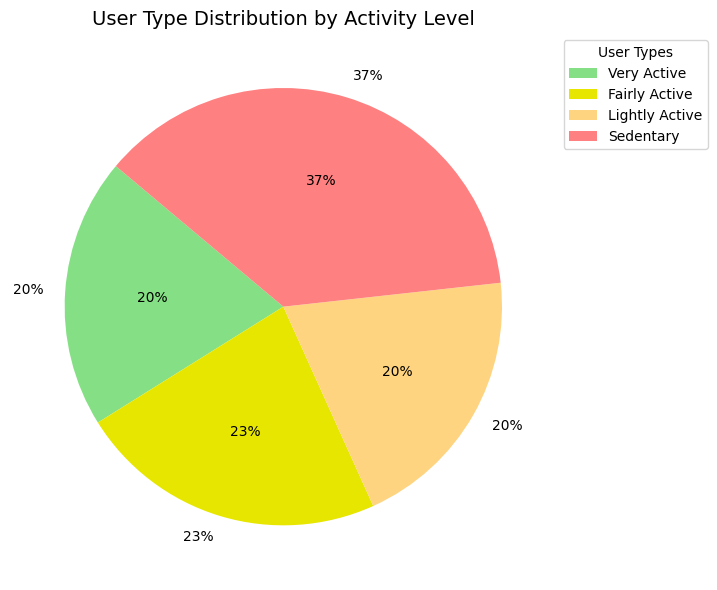

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/DailyActivity.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/DailyActivity.csv")
data_path3 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/MinuteSleep.csv")
data_path4 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/MinuteSleep.csv")

# Load and combine datasets 
daily_activity1 = pd.read_csv(data_path1) 
daily_activity2 = pd.read_csv(data_path2) 
daily_activity = pd.concat([daily_activity1, daily_activity2], ignore_index=True) 

minute_sleep1 = pd.read_csv(data_path3) 
minute_sleep2 = pd.read_csv(data_path4) 
minute_sleep = pd.concat([minute_sleep1, minute_sleep2], ignore_index=True)

# Convert date columns to datetime
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
minute_sleep['ActivityDate'] = pd.to_datetime(minute_sleep['ActivityDate'])

### STEP 1: Calculate total sleep metrics per day
# 0 = awake, 1 = light sleep, 2 = deep sleep, 3 = REM sleep
sleep_states = minute_sleep.groupby(['Id', 'ActivityDate', 'value']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
sleep_states.rename(columns={0: 'AwakeMinutes', 1: 'LightSleepMinutes', 2: 'DeepSleepMinutes', 3: 'RemSleepMinutes'}, inplace=True)

# Calculate total sleep time (sum of light, deep, and REM sleep)
sleep_states['TotalSleepMinutes'] = sleep_states[['LightSleepMinutes', 'DeepSleepMinutes', 'RemSleepMinutes']].sum(axis=1)

### STEP 2: Calculate average sleep and activity metrics per user
# Average sleep metrics per user
average_sleep = sleep_states.groupby('Id')['TotalSleepMinutes'].mean().reset_index()
average_sleep.columns = ['Id', 'MeanDailySleep']

# Average steps and calories from DailyActivity
daily_averages = daily_activity.groupby('Id').agg(
    MeanDailySteps=('TotalSteps', 'mean'),
    MeanDailyCalories=('Calories', 'mean')
).reset_index()

# Merge sleep data with activity data
user_data = pd.merge(daily_averages, average_sleep, on='Id', how='left')

### STEP 3: Classify users based on daily average steps
def classify_user(mean_daily_steps):
    """
    Classify user based on their daily average steps:
    - Sedentary: < 5000 steps
    - Lightly Active: 5000–7499 steps
    - Fairly Active: 7500–9999 steps
    - Very Active: >= 10000 steps
    """
    if mean_daily_steps < 5000:
        return 'Sedentary'
    elif 5000 <= mean_daily_steps < 7500:
        return 'Lightly Active'
    elif 7500 <= mean_daily_steps < 10000:
        return 'Fairly Active'
    else:
        return 'Very Active'

# Apply classification
user_data['UserType'] = user_data['MeanDailySteps'].apply(classify_user)

### STEP 4: Calculate user type distribution
user_type_counts = user_data['UserType'].value_counts(normalize=True).reset_index()
user_type_counts.columns = ['UserType', 'TotalPercent']
user_type_counts['Labels'] = user_type_counts['TotalPercent'].apply(lambda x: f"{x:.0%}")

# Sort the categories for consistent ordering
user_type_counts['UserType'] = pd.Categorical(
    user_type_counts['UserType'], 
    categories=['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary'], 
    ordered=True
)
user_type_counts = user_type_counts.sort_values('UserType')

### STEP 5: Visualize the user type distribution
colors = ["#85e085", "#e6e600", "#ffd480", "#ff8080"]

plt.figure(figsize=(8, 6))
plt.pie(user_type_counts['TotalPercent'], labels=user_type_counts['Labels'], 
        autopct='%1.0f%%', startangle=140, colors=colors, textprops={'fontsize': 10})
plt.legend(user_type_counts['UserType'], title="User Types", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("User Type Distribution by Activity Level", fontsize=14)
plt.tight_layout()
visuals_path = os.path.join(current_dir, "../visuals/User Type Distribution by Activity Level.png")
plt.savefig(visuals_path)
# plt.show()

**Sedentary Users Dominate:**

37% of users fall into the "Sedentary" category (< 5000 steps/day), indicating a significant portion of users with low activity levels.

**Room for Improvement in Light Activity:**

23% of users are "Lightly Active" (5000–7499 steps/day), suggesting potential for engagement strategies to motivate them to move into higher activity levels.

**Highly Active Users:**

20% each in "Fairly Active" (7500–9999 steps/day) and "Very Active" (≥ 10,000 steps/day), indicating a smaller proportion of highly engaged users.

**Opportunity for Growth:**

Target sedentary and lightly active users with motivational campaigns, reminders, or gamified challenges to increase daily activity.

# 8. User Engagement Metrics 

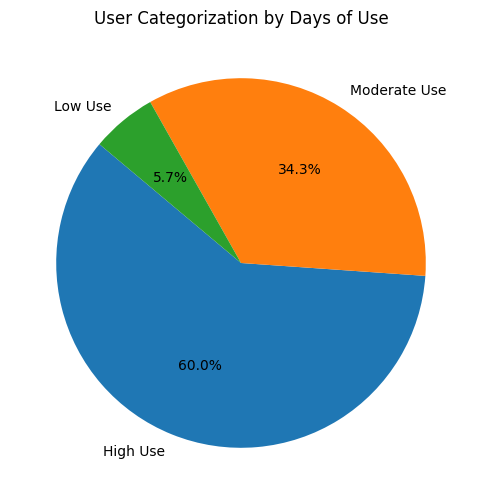

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/DailyActivity.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/DailyActivity.csv")

# Load the datasets
daily_activity1 = pd.read_csv(data_path1)
daily_activity2 = pd.read_csv(data_path2)
daily_activity = pd.concat([daily_activity1, daily_activity2], ignore_index=True)

# Count unique days of use for each user
days_of_use = daily_activity.groupby('Id')['ActivityDate'].nunique().reset_index()
days_of_use.rename(columns={'ActivityDate': 'DaysUsed'}, inplace=True)

# Define categorization thresholds (you can adjust as needed)
def categorize_days_used(days):
    if days <= 20:
        return 'Low Use'
    elif 21 <= days <= 40:
        return 'Moderate Use'
    else:
        return 'High Use'

days_of_use['Category'] = days_of_use['DaysUsed'].apply(categorize_days_used)

# Pie chart visualization
days_count = days_of_use['Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(days_count, labels=days_count.index, autopct='%1.1f%%', startangle=140)
plt.title('User Categorization by Days of Use')

# Save the visualization in the 'visuals' folder
visuals_path = os.path.join(current_dir, "../visuals/User Categorization by Days of Use.png")
plt.savefig(visuals_path)

# Show the plot
plt.show()


**High Usage Dominates:**

60% of users fall into the High Use category (used the app for over 40 days), indicating strong user engagement and retention for a majority.

**Moderate Usage:**

34.3% of users are categorized as Moderate Use (21-40 days), showcasing a significant portion of users with reasonable engagement but room for improvement to convert them to high use.

**Low Usage is Minimal:**

Only 5.7% of users are categorized as Low Use (≤20 days), suggesting that few users fail to engage consistently after initial adoption.

**Retention Strength:**

The high percentage of users in the High Use and Moderate Use categories suggests good overall user retention and potential opportunities to further engage moderate users to boost usage days.

## 9. Activity Level vs Burnt Calories

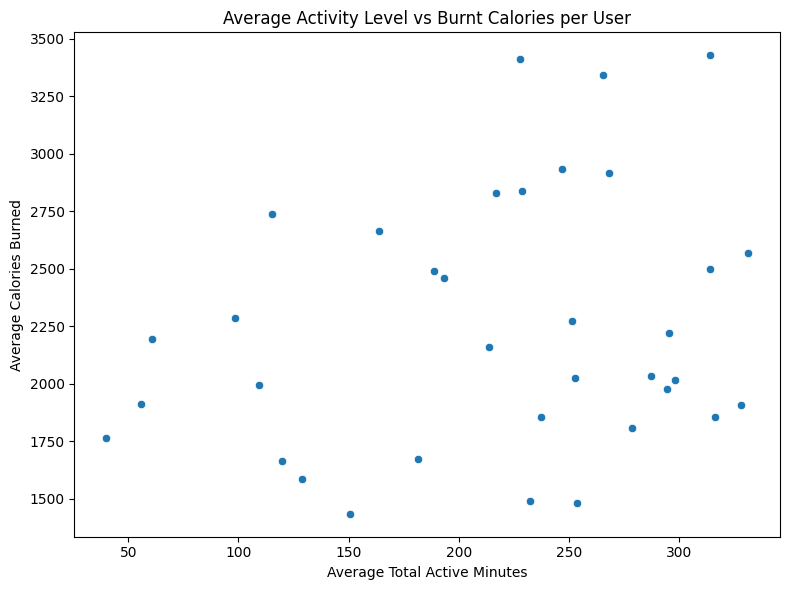

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dynamically get the current directory
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Construct relative paths for the datasets
data_path1 = os.path.join(current_dir, "../data/03.12.2016-04.11.2016/DailyActivity.csv")
data_path2 = os.path.join(current_dir, "../data/04.12.2016-05.12.2016/DailyActivity.csv")

# Load the datasets
daily_activity1 = pd.read_csv(data_path1)
daily_activity2 = pd.read_csv(data_path2)
daily_activity = pd.concat([daily_activity1, daily_activity2], ignore_index=True)

# Create a new column for total active minutes
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']

# Group by user and calculate the average active minutes and calories burned
user_averages = daily_activity.groupby('Id').agg(
    AvgActiveMinutes=('TotalActiveMinutes', 'mean'),
    AvgCalories=('Calories', 'mean')
).reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_averages, x='AvgActiveMinutes', y='AvgCalories')
plt.title("Average Activity Level vs Burnt Calories per User")
plt.xlabel("Average Total Active Minutes")
plt.ylabel("Average Calories Burned")
plt.tight_layout()
# Save the visualization in the 'visuals' folder
visuals_path = os.path.join(current_dir, "../visuals/Average Activity Level vs Burnt Calories per User.png")
plt.savefig(visuals_path)

plt.show()

**Positive Correlation:**

The plot generally shows a positive correlation between average total active minutes and average calories burned, which aligns with the expectation that higher physical activity leads to greater calorie expenditure.

**Variance in Calories Burned:**

For users with similar active minutes, the calories burned vary. This could be due to:
- Differences in user characteristics like age, weight, or metabolism.
- Variation in activity intensity (e.g., lightly active vs. very active).
  
**Activity Range:**

Most users fall between 50–300 active minutes per day, which is realistic for an average population. This suggests a balanced dataset without extreme outliers dominating the analysis.

**Outliers:**

There are a few data points with notably high calories burned for relatively moderate activity levels. These might represent users with higher basal metabolic rates or errors in calorie tracking.